# Week 8 Tutorial
This week comes to the basic statistic learning algorithms, including three basic classification algorithms (decision tree, k-nearest neighbors (knn), and Support Vector Machine （SVM）) , convolutional neural networks and recurrent neural networks. 

In this tutorial, two dataset are applid to learn by these algorithms.

### Q1: 
Consider the following data set comprised of three binary input attributes (A1, A2, and A3) and one binary output:
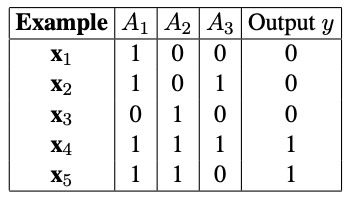
Learn a decision tree for these data. Show the computations made to determine the attribute to split at each node.

### Q2: 
Suppose you had a neural network with linear activation functions. That is, for each unit the output is some constant c times the weighted sum of the inputs.
- a). Assume that the network has one hidden layer. For a given assignment to the weights $\mathbf{w}$, write down equations for the value of the units in the output layer as a function of $\mathbf{w}$ and the input layer $\mathbf{x}$, without any explicit mention of the output of the hidden layer. Show that there is a network with no hidden units that computes the same function.
- b). Repeat the calculation in part a), but this time do it for a network with any number of hidden layers.
- c). Suppose a network with one hidden layer and linear activation functions has n input and output nodes and h hidden nodes. What effect does the transformation in part a) to a network with no hidden layers have on the total number of weights? Discuss in particular the case $h \ll n$.

### Q3: 
The output of the logistic function could be interpreted as a probability p assigned by the model to the proposition that $f (\mathbf{x}) = 1$; the probability that $f (\mathbf{x}) = 0$ is therefore $1 − p$. Write down the probability $p$ as a function of $\mathbf{x}$ and calculate the derivative of $\log p$ with respect to each weight wi. Repeat the process for $\log(1−p)$. These calculations give a learning rule for minimizing the negative-log-likelihood loss function for a probabilistic hypothesis. Comment on any resemblance to other learning rules we learn today.


# Classification Algorithms (supervised learning)

# On Dataset 1:
As an example that only consider the simple case of a classification task.

We begin with the standard imports:

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
# use seaborn plotting defaults

Consider the following two-dimensional data, which has one of five class labels:

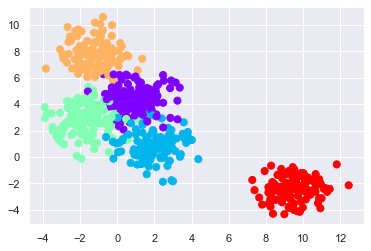

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=600, centers=5,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Split arrays or matrices into random train and test subsets

The :mod:`sklearn.model_selection._split` module includes classes and
functions to split the data based on a preset strategy.

In [46]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, y)

Now, we can quickly classify the 600 points above by using the three classifiers as follows:

# Decision Tree Classifier:
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.
  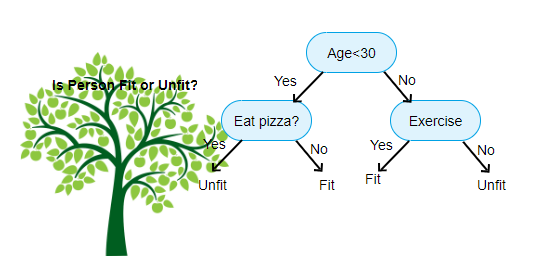
A decision tree consists of three types of nodes:
Decision nodes – typically represented by squares; Chance nodes – typically represented by circles; 
End nodes – typically represented by triangles

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Make an instance of the Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth = 4);
#Train the model on the data
dt_model.fit(xtrain1, ytrain1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let's write a quick utility function to help us visualize the output of the classifier:

In [48]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now we can examine what the decision tree classification looks like:

D:\CityU\CS1102\Anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


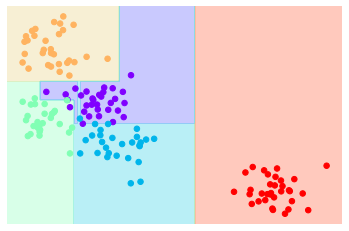

In [50]:
visualize_classifier(DecisionTreeClassifier(), xtest1, ytest1)

Now, we can take a look at the classification report for this decision tree classifier

In [51]:
from sklearn import metrics
dt_ypred = dt_model.predict(xtest1)
print(metrics.classification_report(dt_ypred,ytest1))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.82      1.00      0.90        23
           2       0.96      0.87      0.91        30
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        33

    accuracy                           0.93       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150



And for good measure, we're going to plot the confusion matrix:

Text(89.18, 0.5, 'predicted label')

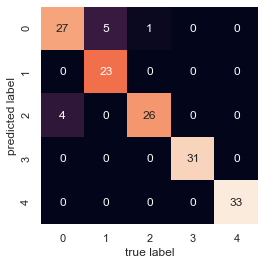

In [52]:
from sklearn.metrics import confusion_matrix
dt_mat = confusion_matrix(ytest1, dt_ypred)
sns.heatmap(dt_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Evaluating and selecting the model based on five-fold cross validation

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_model, X, y, cv=5)

array([0.925     , 0.925     , 0.94166667, 0.975     , 0.91666667])

# k-Nearest Neighbors Classifier

In k-NN classification, the input consists of the k closest training examples in data set, and the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

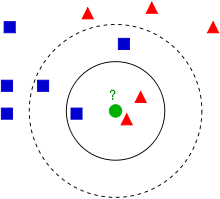
Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification (A commonly used distance metric for continuous variables is Euclidean distance. For discrete variables, such as for text classification, another metric can be used, such as the overlap metric or Hamming distance), if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

For the normalization of data

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the L1, L2, or max norms:

In [9]:
from sklearn import preprocessing
x_normalized = preprocessing.normalize(xtest1, norm='l2')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#Make an instance of the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=3)
#Train this KNN Model on data
knn_model.fit(xtrain1, ytrain1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
knn_ypred = knn_model.predict(xtest1)
print(metrics.classification_report(knn_ypred,ytest1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        34
           2       1.00      0.97      0.99        34
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00        24

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



Text(89.18, 0.5, 'predicted label')

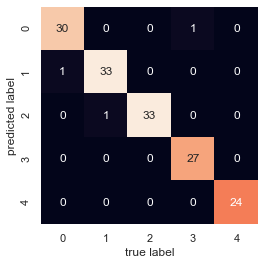

In [12]:
knn_mat = confusion_matrix(ytest1, knn_ypred)
sns.heatmap(knn_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Support Vector Machine
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in classification problems.

SVM simply try to find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.
   
To make the Motivation of SVM clear:
As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated: The dataset used above are resampling that only two different types of point

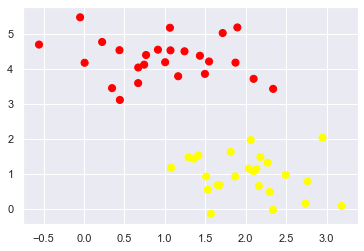

In [13]:
#Resampling a simple dataset
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

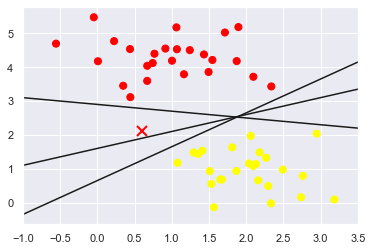

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

SVM: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

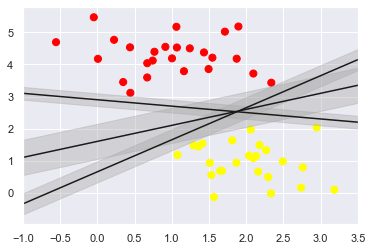

In [15]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In SVMs, the line that maximizes this margin is the one we will choose as the optimal model. SVMs are an example of such a maximum margin estimator.

Fitting a SVM

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [16]:
from sklearn.svm import SVC # "Support vector classifier"
svm_model = SVC(kernel='linear', C=1E10)
svm_model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

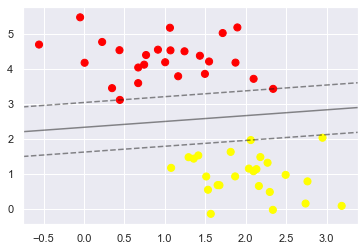

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm_model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [18]:
svm_model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

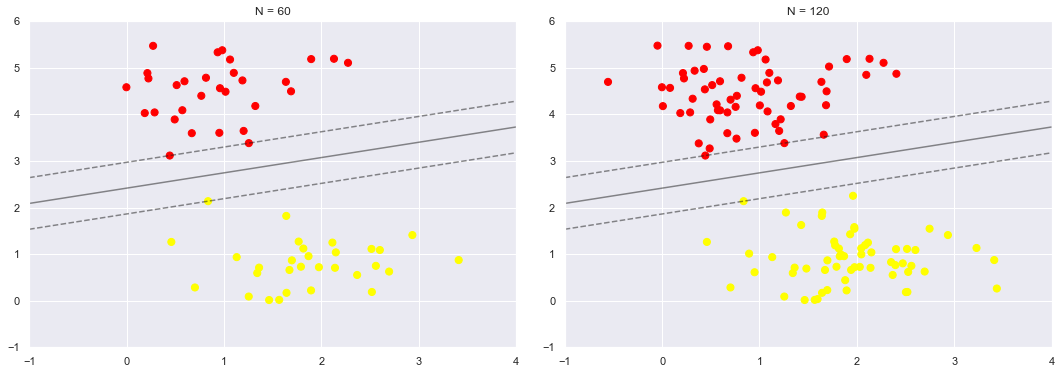

In [19]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

If you are running this notebook live, you can use IPython's interactive widgets to view this feature of the SVM model interactively:

In [23]:
#from ipywidgets import interact, fixed
#interact(plot_svm, N=[10, 200], ax=fixed(None));

# On dataset 2


In [24]:
from sklearn.datasets import fetch_lfw_people
#Load the Labeled Faces in the Wild (LFW) people dataset (classification).
#Based on the Parameter min_faces_per_person: 
#The extracted dataset will only retain pictures of people that have at least min_faces_per_person different pictures.
faces = fetch_lfw_people(min_faces_per_person=60)
#To remind us what we're looking at
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


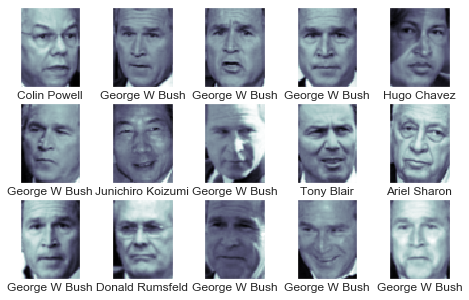

In [25]:
#Display the faces: each image is 62*47 nearly 3000 pixels
fig, ax = plt.subplots(3, 5, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [26]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(faces.data, faces.target, random_state=42)

# Using Decision Tree

In [27]:
#Make an instance of the Decision Tree Model
dt_model2 = DecisionTreeClassifier(max_depth = 5);
#Train the model on the data
dt_model2.fit(xtrain2, ytrain2)
dt_ypred2 = dt_model2.predict(xtest2)

Now, we can take a look at the classification report for this decision tree classifier

In [28]:
print(metrics.classification_report(dt_ypred2,ytest2))

              precision    recall  f1-score   support

           0       0.13      0.40      0.20         5
           1       0.78      0.36      0.49       149
           2       0.10      0.30      0.15        10
           3       0.48      0.55      0.52       110
           4       0.26      0.29      0.27        21
           5       0.40      0.62      0.48        13
           6       0.08      0.12      0.10         8
           7       0.12      0.24      0.16        21

    accuracy                           0.41       337
   macro avg       0.29      0.36      0.30       337
weighted avg       0.55      0.41      0.44       337



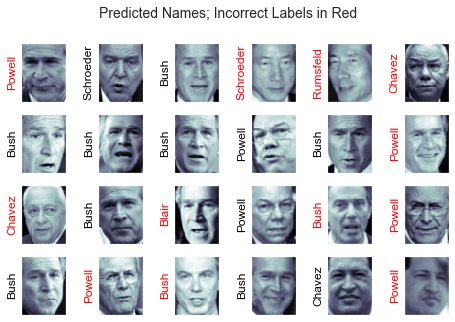

In [29]:
fig, ax = plt.subplots(4, 6, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[dt_ypred2[i]].split()[-1],
                   color='black' if dt_ypred2[i] == ytest2[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# By KNN

In [30]:
#Make an instance of the KNN Model
knn_model2 = KNeighborsClassifier(n_neighbors=5)
#Train this KNN Model on data
knn_model2.fit(xtest2, ytest2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn_ypred2 = knn_model2.predict(xtest2)
print(metrics.classification_report(knn_ypred2,ytest2))

              precision    recall  f1-score   support

           0       0.27      0.50      0.35         8
           1       0.93      0.58      0.72       108
           2       0.65      0.61      0.62        33
           3       0.81      0.71      0.76       143
           4       0.26      0.67      0.38         9
           5       0.30      0.55      0.39        11
           6       0.50      0.75      0.60         8
           7       0.33      0.82      0.47        17

    accuracy                           0.66       337
   macro avg       0.51      0.65      0.54       337
weighted avg       0.76      0.66      0.68       337



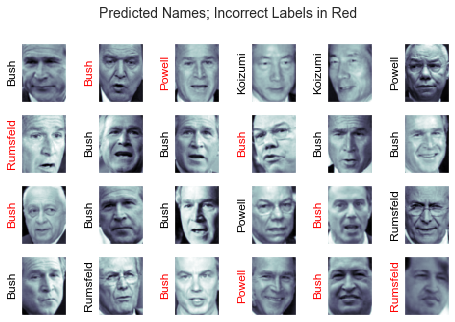

In [32]:
fig, ax = plt.subplots(4, 6, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[knn_ypred2[i]].split()[-1],
                   color='black' if knn_ypred2[i] == ytest2[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# By SVM

In [33]:
svm_model2 = SVC(kernel='linear', C=1E10)
svm_model2.fit(xtrain2, ytrain2)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

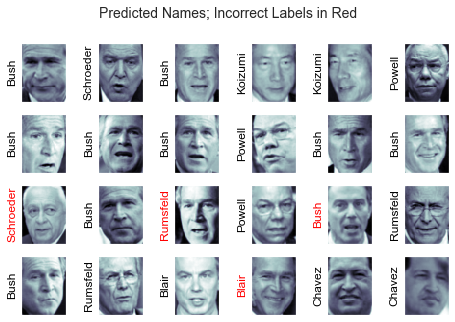

In [34]:
svm_ypred2 = svm_model2.predict(xtest2)
fig, ax = plt.subplots(4, 6, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[svm_ypred2[i]].split()[-1],
                   color='black' if svm_ypred2[i] == ytest2[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [35]:
print(metrics.classification_report(svm_ypred2,ytest2))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.85      0.82      0.83        71
           2       0.74      0.72      0.73        32
           3       0.84      0.90      0.87       118
           4       0.78      0.67      0.72        27
           5       0.65      0.93      0.76        14
           6       1.00      0.80      0.89        15
           7       0.86      0.80      0.83        45

    accuracy                           0.82       337
   macro avg       0.80      0.79      0.79       337
weighted avg       0.82      0.82      0.82       337



# Clustering: K-means (unsupervised learning)
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
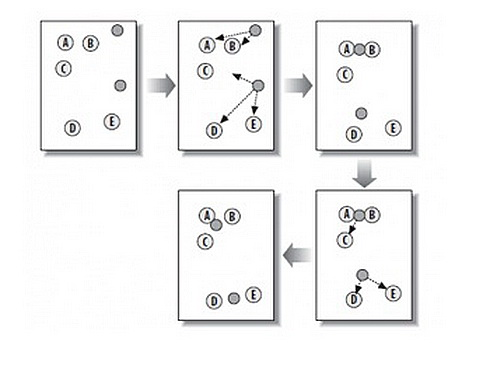The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.

To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

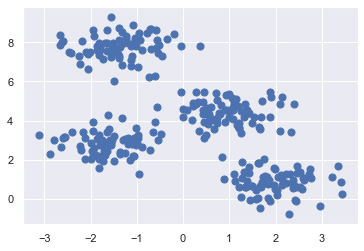

In [36]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

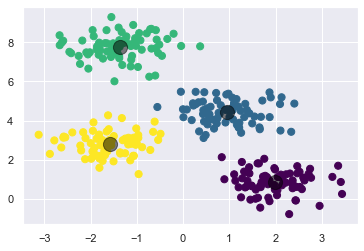

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# k-means on faces
Here we will attempt to use k-means to try to identify similar faces without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

Recall that the faces we getted consist of 1,348 samples with 2914 features, where each of the 2914 features is the brightness of one pixel in an 62×47 image, as follow:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)

The clustering can be performed as we did before:

In [39]:
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(faces.data)
kmeans.cluster_centers_.shape

(8, 2914)

The result is 8 clusters in 2914 dimensions. Notice that the cluster centers themselves are 2914-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

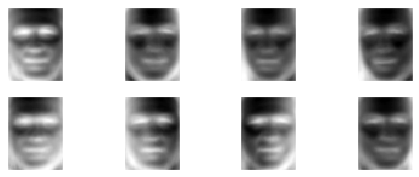

In [40]:
fig, ax = plt.subplots(2, 4, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(8, 62, 47)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable faces, with perhaps the exceptions.

Now we can check how accurate our unsupervised clustering was in finding similar faces within the data:

Because k-means knows nothing about the identity of the cluster, the 0–7 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [41]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(8):
    mask = (clusters == i)
    labels[mask] = mode(faces.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(faces.target, labels)

0.4035608308605341

 Let's check the confusion matrix for this:

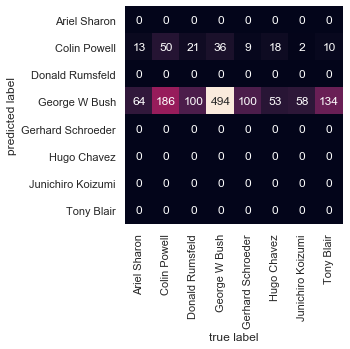

In [42]:
mat = confusion_matrix(faces.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Week 9 Tutorial
This notebook aims to describe the implementation of three basic deep learning models (i.e., multi-layer perceptron, convolutional neural network, and recurrent neural network). Based on the given toy examples, we can know how they work and which tasks they are good at.

## Handwritten digit database MNIST 

training set: 60 k

testing set: 10 K

The picture below shows how to represent the picture of the left in a matrix format, but the size of this matrix format is different from the MNIST dataset’s (28x28).

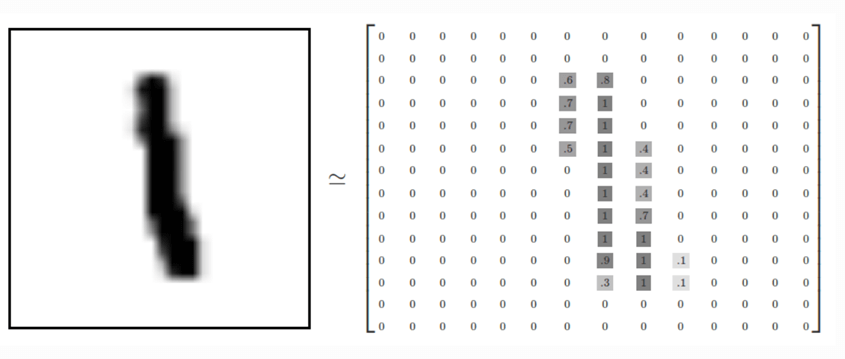


Here are some examples for MNIST samples:

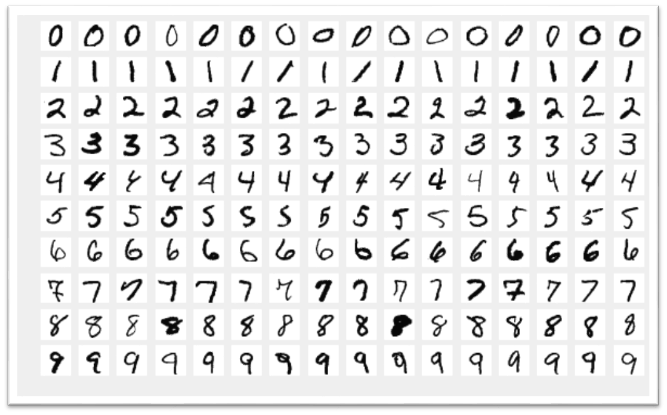

Let's take a look at the performance that some researchers have achieved on the MNIST database.

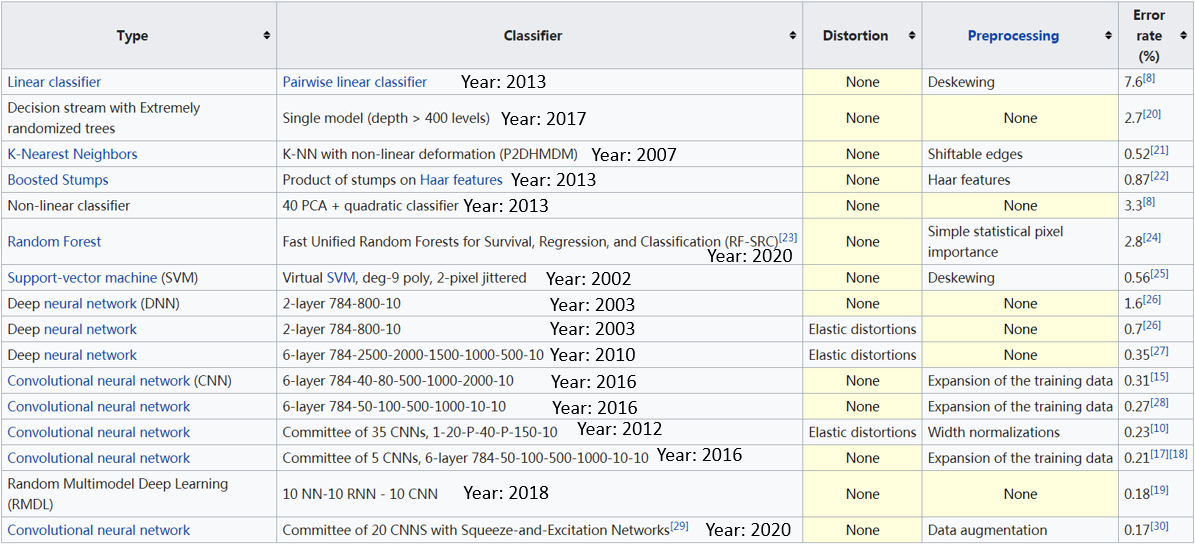

## Multi-layer perceptron (MLP)

### Overview

Although the Perceptron may seem like a good way to make classifications, it is a linear classifier (which, roughly, means it can only draw straight lines to divide spaces) and therefore it can be stumped by more complex problems. To solve this issue we can extend Perceptron by employing multiple layers of its functionality. The construct we are left with is called a Neural Network, or a Multi-Layer Perceptron, and it is a non-linear classifier. It achieves that by combining the results of linear functions on each layer of the network.

Similar to the Perceptron, this network also has an input and output layer; however, it can also have a number of hidden layers. These hidden layers are responsible for the non-linearity of the network. The layers are comprised of nodes. Each node in a layer (excluding the input one), holds some values, called weights, and takes as input the output values of the previous layer. The node then calculates the dot product of its inputs and its weights and then activates it with an activation function (e.g. sigmoid activation function). Its output is then fed to the nodes of the next layer. Note that sometimes the output layer does not use an activation function, or uses a different one from the rest of the network. The process of passing the outputs down the layer is called feed-forward.

After the input values are fed-forward into the network, the resulting output can be used for classification. The problem at hand now is how to train the network (i.e. adjust the weights in the nodes). To accomplish that we utilize the Backpropagation algorithm. In short, it does the opposite of what we were doing up to this point. Instead of feeding the input forward, it will track the error backwards. So, after we make a classification, we check whether it is correct or not, and how far off we were. We then take this error and propagate it backwards in the network, adjusting the weights of the nodes accordingly. We will run the algorithm on the given input/dataset for a fixed amount of time, or until we are satisfied with the results. The number of times we will iterate over the dataset is called epochs. In a later section we take a detailed look at how this algorithm works.

NOTE: Sometimes we add another node to the input of each layer, called bias. This is a constant value that will be fed to the next layer, usually set to 1. The bias generally helps us "shift" the computed function to the left or right.

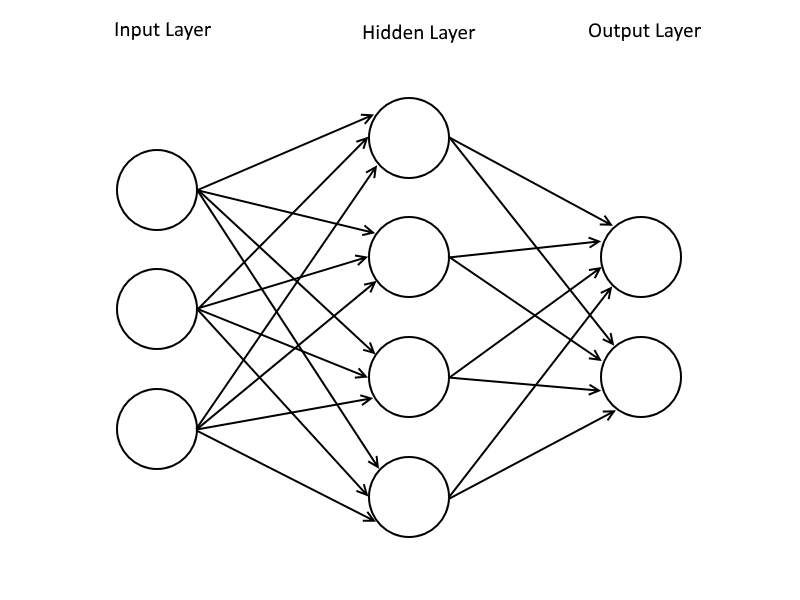

### Implementation


In [2]:
# Create the model
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist.train
sess = tf.InteractiveSession()

#initialization
in_units = mnist.train.images.shape[1] #784: 28*28
h1_units = 300
out_units = 10 # 0,1,2,3,4,5,6,7,8,9

epoch = 3000
batch_size = 100

W1 = tf.Variable(tf.truncated_normal([in_units, h1_units], stddev=0.1))
b1 = tf.Variable(tf.zeros([h1_units]))
W2 = tf.Variable(tf.zeros([h1_units, out_units]))
b2 = tf.Variable(tf.zeros([out_units]))

x = tf.placeholder(tf.float32, [None, in_units])
keep_prob = tf.placeholder(tf.float32) 
#Keep_prob controls the regularization rate to randomly drop out the given elements 
#in those neurons in the fully connected layer during training

hidden1 = tf.nn.relu(tf.matmul(x, W1) + b1)  #relu(w1 * x + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + b2)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(0.3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Train
tf.global_variables_initializer().run()
for i in range(epoch):
  batch_xs, batch_ys = mnist.train.next_batch(batch_size)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_: batch_ys, keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run({x: batch_xs, y_: batch_ys, keep_prob: 0.75})
  
# Test trained model
print("testing accuracy %g"%accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.91
step 200, training accuracy 0.93
step 300, training accuracy 0.91
step 400, training accuracy 0.96
step 500, training accuracy 0.95
step 600, training accuracy 0.99
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.97
step 1000, training accuracy 0.98
step 1100, training accuracy 0.99
step 1200, training accuracy 0.99
step 1300, training accuracy 0.98
step 1400, training accuracy 0.96
step 1500, training accuracy 0.99
step 1600, training accuracy 0.99
step 1700, training accuracy 1
step 1800, training accuracy 0.99
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 0.98
step 2200, training accuracy 0.95
step 2300, training accuracy 0.98
step 2400, 

## Convolutional neural network (CNN)

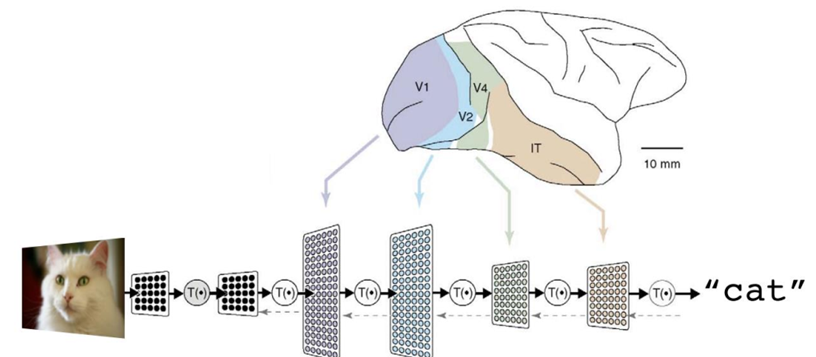

### Overview

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. Convolutional Neural Networks learn a complex representation of visual data using vast amounts of data. They are inspired by the human visual system and learn multiple layers of transformations, which are applied to top of each other to extract a progressively more sophisticated representation of the input. 

### How CNN work

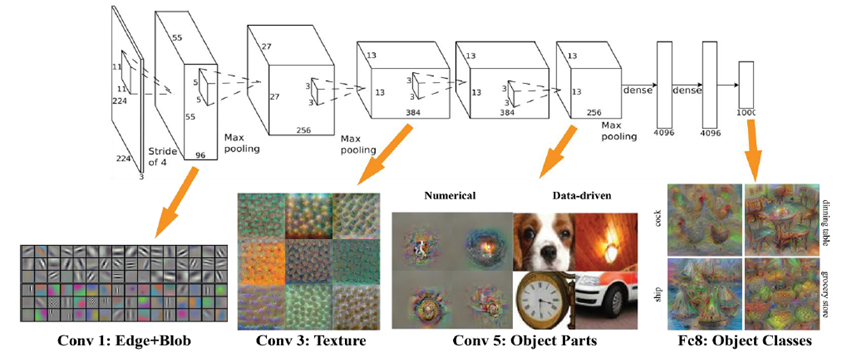

**Convolution layer**: a feature detector that automagically learns to filter out not needed information from an input by using convolution kernel. Each layer applies a convolution operation to the input, passing the result to the next layer. The convolution emulates the response of an individual neuron to visual stimuli. Each convolutional neuron processes data only for its receptive field.

**Pooling layers**: reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters. Pooling may compute a *max* or an *average*. Max pooling uses the maximum value from each of a cluster of neurons at the prior layer. Average pooling uses the average value from each of a cluster of neurons at the prior layer.

### Implementation

In [3]:
#Outputs random values from a truncated normal distribution
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

#Embeds constant values in the graph
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

#Constructs a two-dimensional convolutional layer with the number of filters, 
#filter kernel size, padding and activation function as arguments
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#Constructs a two-dimensional pooling layer using the max-pooling algorithm
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  

#Initialize the input and output layers
x = tf.placeholder(tf.float32, [None, in_units])
y_ = tf.placeholder(tf.float32, [None, out_units])
x_image = tf.reshape(x, [-1,28,28,1])

#Specify convolutional layers, pooling layers and fully connected layer 
W_conv1 = weight_variable([5, 5, 1, 32]) # Apply 32 5*5 filters to one channel
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64]) # Apply 64 5*5 filters to 32 channel
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

'''After two times of max-pooling layers of 2x2 filters, the output feature maps were 
normalized to fit in a 7x7 (49) pixel box and then their dimensionalities were reduced 
by 1024 neurons of the fully connected layer
'''
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Define the output layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.global_variables_initializer().run()
for i in range(epoch):
  batch = mnist.train.next_batch(batch_size)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.89
step 200, training accuracy 0.9
step 300, training accuracy 0.93
step 400, training accuracy 0.94
step 500, training accuracy 0.96
step 600, training accuracy 0.98
step 700, training accuracy 0.97
step 800, training accuracy 0.92
step 900, training accuracy 0.95
step 1000, training accuracy 0.96
step 1100, training accuracy 0.93
step 1200, training accuracy 0.95
step 1300, training accuracy 0.96
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.96
step 1900, training accuracy 0.99
step 2000, training accuracy 0.98
step 2100, training accuracy 0.98
step 2200, training accuracy 0.95
step 2300, training accuracy 0.99
step 2400, training accuracy 0.99
step 2500, training accuracy 0.99
step 2600, training accuracy 0.99
step 2700, training accuracy 0.97
step 2800, training accuracy 0.99
step 2900, training accuracy 0.

## Recurrent neural network (RNN)

### Overview

RNN: A class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs.

- Feedforward neural networks (e.g. MLPs and CNNs) are powerful, but they are not optimized to handle "sequential" data
- In other words, they do not possess "memory" of previous inputs
- For instance, consider the case of translating a corpus. You need to consider the **"context"** to guess the next word to come forward

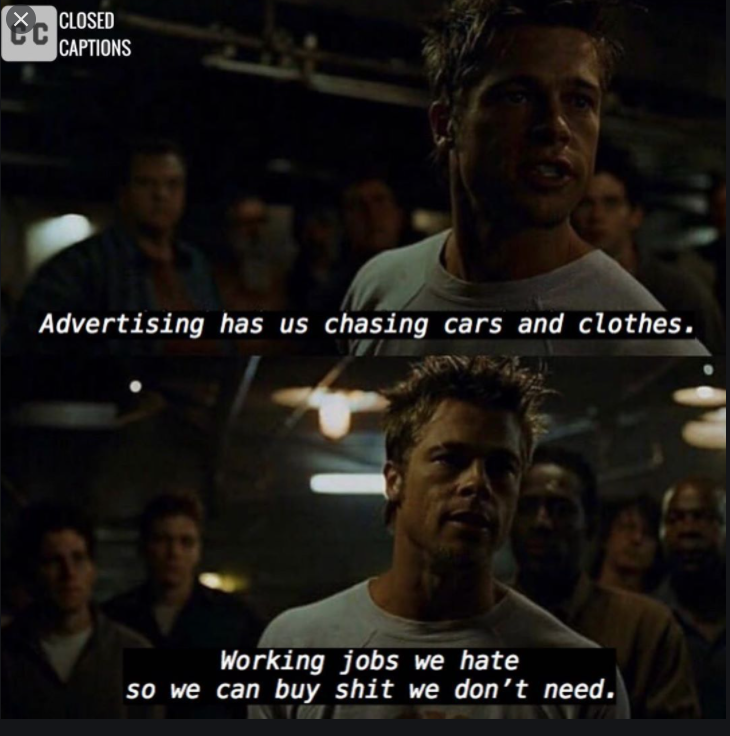


- RNNs are suitable for dealing with sequential format data since they have **"recurrent"** structure
- To put it differently, they keep the **"memory"** of earlier inputs in the sequence

<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" style="width: 600px"/>

<br>
- However, in order to reduce the number of parameters, every layer of different time steps shares same parameters
</br>

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" style="width: 600px"/>

### Implementation (Keras)


In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

#Tring set: 1395
#Tesing set: 599
unit_num = 100

# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data) #one-hot encoding

y_train = y_data[:1395]
y_test = y_data[1395:]

def naive_rnn():
    model = Sequential() # sequential class is a linear stack of layers in Keras
    model.add(SimpleRNN(unit_num, input_shape = (X_train.shape[1],1), return_sequences = False))
    model.add(Dense(y_data.shape[1])) # output units
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model


model = KerasClassifier(build_fn = naive_rnn, epochs = 200, batch_size = 50, verbose = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)
print(accuracy_score(y_pred, y_test_))

ModuleNotFoundError: No module named 'tensorflow'

## References

- https://github.com/aimacode/aima-python
- https://github.com/buomsoo-kim/Easy-deep-learning-with-Keras